### Chapter 8: Trees & Random Forests

Practical task: Titanic example

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix

In [20]:
input_train = pd.read_csv('input/titanic-train.csv')
input_test = pd.read_csv('input/titanic-test.csv')

input_train = input_train.drop(['name'], axis=1)
input_train = pd.get_dummies(input_train, columns=['sex'], drop_first=True)
input_train = pd.get_dummies(input_train)

input_test = input_test.drop('name', axis=1)
input_test = pd.get_dummies(input_test, columns=['sex'], drop_first=True)
input_test = pd.get_dummies(input_test)

input_train.head()

,pclass,age,sibsp,parch,fare,survived,sex_male,embarked_C,embarked_Q,embarked_S
0,3,25.0,0,0,7.0500,0,True,False,False,True
1,3,28.0,0,0,22.5250,0,True,False,False,True
2,3,26.0,0,0,7.8958,0,True,False,False,True
3,3,18.0,0,0,8.3000,0,True,False,False,True
4,3,18.0,0,0,7.2292,1,False,True,False,False


In [21]:
X_train = input_train.drop(['survived'], axis=1)
y_train = input_train['survived']
X_test = input_test.drop(['survived'], axis=1)
y_test = input_train['survived']

In [22]:
model = DecisionTreeClassifier(min_samples_leaf=10)
model.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=10)

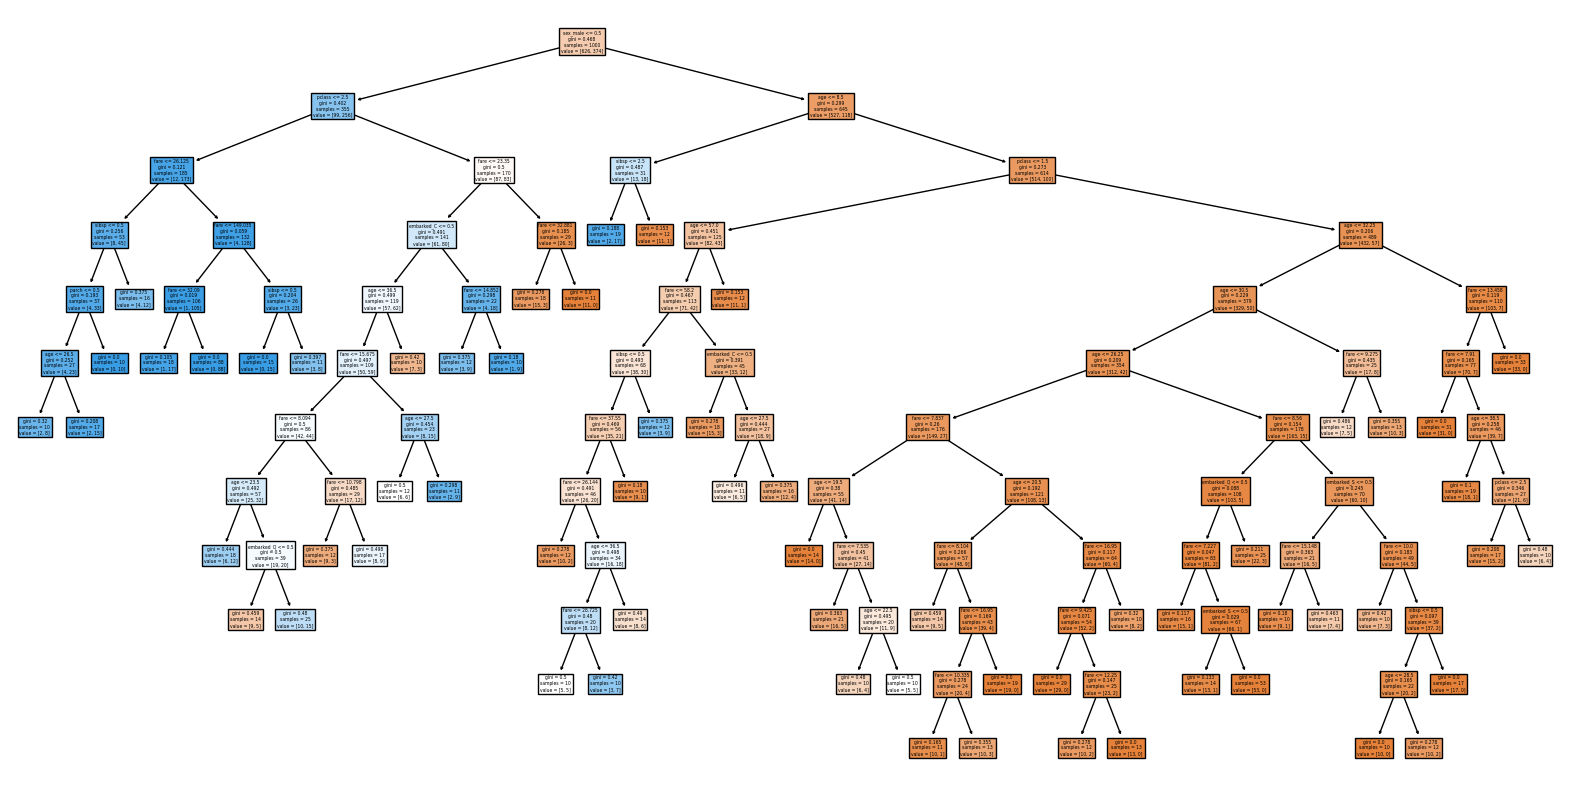

In [24]:
pred = model.predict(input_test.drop('survived', axis=1))
acc = accuracy_score(input_test['survived'], pred)
conf_m = confusion_matrix(input_test['survived'], pred)

plt.figure(figsize=(20, 10))
plot_tree(model, filled=True, feature_names=X_train.columns)
plt.show()